# Calculate and Plot Phasor Plots

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import napari
from PhasorPy import phasor, phasor_plot, rgb_coloring, phasor_circle, histogram_filtering
from matplotlib import colors

## Make Synthetic FLIM data

In [2]:
def monoexp(x, a, tau):
    import numpy as np
    return a * np.exp(-(1/tau)*x)

In [3]:
laser_frequency = 60 # MHz
total_time_points = 270
laser_time_window = 1 / (laser_frequency * 10**6)
laser_time_window_ns = laser_time_window * 10**9

time_step = laser_time_window_ns / total_time_points # ns

array = np.arange(0, total_time_points)
time_array = array * time_step

In [4]:
laser_time_window_ns

16.666666666666668

In [5]:
time_step

0.0617283950617284

In [6]:
a = 1
tau = 1 # ns

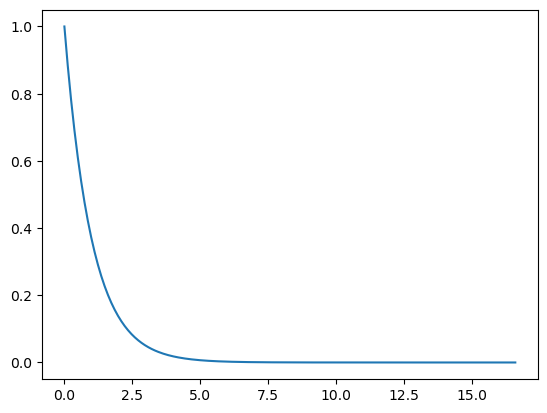

In [7]:
plt.plot(time_array, monoexp(time_array, a, tau))

In [10]:
intensity = monoexp(time_array, a, tau)
flim_data_stack = np.repeat(intensity[:, np.newaxis], 25, axis=1).reshape(total_time_points, 5, 5)

## FFT

In [11]:
flim_data_fft = np.fft.fft(flim_data_stack, axis=0)

In [12]:
harmonic = 1

In [13]:
flim_data_fft[0].real

array([[16.70514274, 16.70514274, 16.70514274, 16.70514274, 16.70514274],
       [16.70514274, 16.70514274, 16.70514274, 16.70514274, 16.70514274],
       [16.70514274, 16.70514274, 16.70514274, 16.70514274, 16.70514274],
       [16.70514274, 16.70514274, 16.70514274, 16.70514274, 16.70514274],
       [16.70514274, 16.70514274, 16.70514274, 16.70514274, 16.70514274]])

In [14]:
g = flim_data_fft[harmonic].real
g /= flim_data_fft[0].real
s = flim_data_fft[harmonic].imag
s /= -flim_data_fft[0].real   

In [15]:
g

array([[0.87932581, 0.87932581, 0.87932581, 0.87932581, 0.87932581],
       [0.87932581, 0.87932581, 0.87932581, 0.87932581, 0.87932581],
       [0.87932581, 0.87932581, 0.87932581, 0.87932581, 0.87932581],
       [0.87932581, 0.87932581, 0.87932581, 0.87932581, 0.87932581],
       [0.87932581, 0.87932581, 0.87932581, 0.87932581, 0.87932581]])

In [16]:
s

array([[0.31998219, 0.31998219, 0.31998219, 0.31998219, 0.31998219],
       [0.31998219, 0.31998219, 0.31998219, 0.31998219, 0.31998219],
       [0.31998219, 0.31998219, 0.31998219, 0.31998219, 0.31998219],
       [0.31998219, 0.31998219, 0.31998219, 0.31998219, 0.31998219],
       [0.31998219, 0.31998219, 0.31998219, 0.31998219, 0.31998219]])

In [17]:
(g - 0.5)**2 + s**2

array([[0.24627667, 0.24627667, 0.24627667, 0.24627667, 0.24627667],
       [0.24627667, 0.24627667, 0.24627667, 0.24627667, 0.24627667],
       [0.24627667, 0.24627667, 0.24627667, 0.24627667, 0.24627667],
       [0.24627667, 0.24627667, 0.24627667, 0.24627667, 0.24627667],
       [0.24627667, 0.24627667, 0.24627667, 0.24627667, 0.24627667]])

In [ ]:
def phasor_circle(ax):
    x = np.arange(

In [ ]:
n_harmonics = 4
fig, ax = plt.subplots(n_harmonics, 1, figsize=(8, n_harmonics*5))


In [80]:
ic = 0

In [20]:
x

array([0.87932581, 0.87932581, 0.87932581, 0.87932581, 0.87932581,
       0.87932581, 0.87932581, 0.87932581, 0.87932581, 0.87932581,
       0.87932581, 0.87932581, 0.87932581, 0.87932581, 0.87932581,
       0.87932581, 0.87932581, 0.87932581, 0.87932581, 0.87932581,
       0.87932581, 0.87932581, 0.87932581, 0.87932581, 0.87932581])

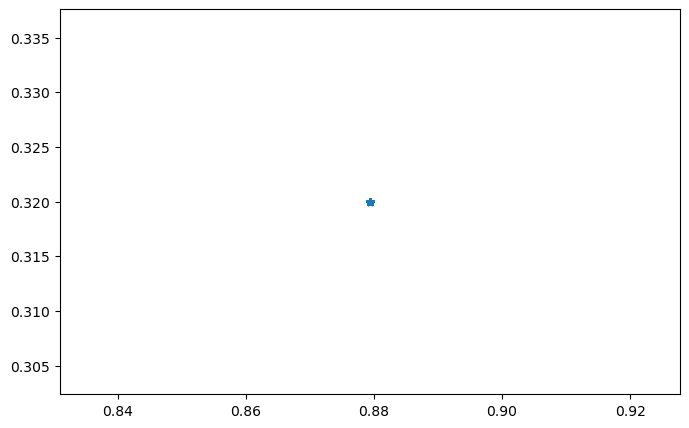

In [22]:
n_harmonics = 1
fig, ax = plt.subplots(n_harmonics, 1, figsize=(8, n_harmonics*5))
for i in range(n_harmonics):
    # g, s, md, ph, dc = phasor(flim_data_stack, harmonic = i+1)
    # x, y = histogram_filtering(dc, g, s, ic)
    x = np.ravel(g)
    y = np.ravel(s)
    ax.plot(x,y, '*')
    # ax.hist2d(x, y, bins=256, norm=colors.LogNorm(), range=[[-1, 1], [-1, 1]], )
    # phasor_circle(ax[i])
    
    #, range = [[-1, 1], [-1, 1]])
    # ax[i].hist2d(x, y, bins=256, cmap="RdYlGn_r", norm=colors.LogNorm(), range=[[-1, 1], [-1, 1]])

    # # ax[i].scatter(x,y,marker='.', s=4)
    # ax[i].hist2d(x, y, bins=256)
    

In [12]:
# fig, ax = plt.subplots()
# x, y = histogram_filtering(dc, g, s, ic)
# ax.hist2d(x, y, bins=256, cmap="RdYlGn_r", norm=colors.LogNorm(), range=[[-1, 1], [-1, 1]])
# ax.set_title('Phasor')
# phasor_circle(ax)